# Sitzung 7

Diese Skripte sind ausschließlich als Zusatz-Material gedacht. Speziell für diejenigen unter Euch, die einen Einblick in das Programmieren gewinnen wollen. Wenn Du es also leid bist repetitive Tätigkeiten auszuführen und das lieber einer Maschine überlassen willst, bist Du hier genau richtig. 

<span style="color:red"> Die Codes sind nicht für die Klausur relevant, genau genommen haben sie mit dem Lehrstuhl für Statistik __rein gar nichts__ zu tun. </span>

---

In [1]:
import numpy as np
from scipy.stats import norm
from seaborn import kdeplot
from matplotlib import pyplot as plt
from ipywidgets import interactive

## Der zentrale Grenzwertsatz

In [2]:
np.random.uniform(size=10)

array([0.56231943, 0.66360222, 0.26848455, 0.90723362, 0.80998811,
       0.3410233 , 0.82562409, 0.97214023, 0.28764677, 0.63438074])

In [3]:
x = np.random.uniform(size=5)
x_bar = x.mean()
print("Werte von x:\n", x)
print("Mittelwert von x:", x_bar)

Werte von x:
 [0.99552814 0.00116408 0.31921785 0.95775024 0.60462793]
Mittelwert von x: 0.5756576467177826


In [4]:
X = np.random.uniform(size=(3, 5))
print(X)

[[0.52512296 0.52032329 0.7629482  0.18813001 0.83103334]
 [0.37148371 0.2867949  0.81405914 0.64394126 0.35256341]
 [0.91585338 0.65202656 0.40114155 0.54652867 0.81274563]]


In [5]:
X.mean(axis=1)

array([0.56551156, 0.49376848, 0.66565916])

### Wie ist der Mittelwert $\bar{X}$ verteilt?

In [6]:
def mean_viewer(sample_size=5):
    X = np.random.uniform(size=(10000, sample_size))
    # empirical
    X_bar = X.mean(axis=1)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    kdeplot(X_bar, label="empirische Dichte", ax=ax)
    
    # theoretical
    mu = X_bar.mean()
    sigma = np.std(X_bar)
    x = np.linspace(0, 1, 100)
    f_x = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-0.5*((x-mu)/sigma)**2)
    ax.plot(x, f_x, "--", c="red", alpha=0.5,
            label="$Z \sim N({:3.3}, {:3.3})$".format(mu, sigma))
    plt.title("Beispiel: zentraler Grenzwertsatz")
    plt.legend()
    
interactive(mean_viewer,
            sample_size=(1, 1000, 1))

interactive(children=(IntSlider(value=5, description='sample_size', max=1000, min=1), Output()), _dom_classes=…

---
## Monte-Carlo Simulation zu Aufgabe 7-8:

Die Zufallsvariable $X_i$: Anzahl Tippfehler auf Seite $i$ hat die folgende Wahrscheinlichkeitsfunktion:

|$X=x$   | 1   | 2   | 3   |
|:-------|:---:|:---:|:---:|
|$P(X=x)$| 0.7 | 0.2 | 0.1 |

Das macht es schwierig eine geschlossene Lösung für die Zufallsvariable $Y=\sum\limits_{i=1}^{1100} X_i$ zu finden. Und immer wenn es schwierig wird etwas zu berechnen, ist es eine gute Idee den Sachverhalt erst einmal zu simulieren - das geht nämlich oft erstaunlich einfach.

Als Simulation bezeichnen wir alle Rechnungen, die zusätzlich zu den Grundrechenarten auch noch das Ziehen von *Zufallszahlen* erlauben. Der Vorteil von solchen Methoden ist, dass wir sehr intuitiv vorgehen können - im Grunde probieren wir unser Experiment sehr oft und sehen uns danach an, was im Schnitt passiert ist.

Die Anzahl Tippfehler für eine Seite sind ein Zufallsexperiment und wir können es mit diesem Ausdruck ausführen:

In [7]:
np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1], replace=True)

3

Wir können es nicht nur einmal ausführen, sondern mehrfach - genau genommen wollen wir das Experiment für alle 1100 Seiten ausführen, um eine Realisation $y$ für die Zufallsvariable $Y$ zu bekommen.

In [8]:
xi_list = np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1], replace=True, size=1100)
print("Realisationen für X_i:", xi_list)

y = sum(xi_list)
print("Realisation für Y:", y)

Realisationen für X_i: [1 2 1 ... 3 1 1]
Realisation für Y: 1526


Ok, wir haben das jetzt genau einmal durchgeführt, das hilft uns noch relativ wenig. Wie wäre es, wenn wir das gleiche Experiment sehr oft durchführen würden? Gäbe es dann Muster, würden immer ähnliche Werte für $Y=y$ heraus kommen oder würden sie sehr verschieden voneinander sein?

Das sind alles Fragen, die uns die Verteilung von $Y$ beantworten könnte. Und genau die wollen wir jetzt schätzen. 

In [9]:
X_i = np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1], replace=True, size=(100000, 1100))
Y = X_i.sum(axis=1)
print(Y)

[1517 1569 1525 ... 1501 1515 1573]


Wir haben jetzt unseren simulierten Autor satte 100000 Romane schreiben lassen (`X_i`), seine Tippfehler gezählt und sie in `Y` abgespeichert. Der nächste Schritt ist nun, die Werte zu sortieren, und zu zählen wie oft sie vorkommen.

In [24]:
vals, counts = np.unique(Y, return_counts=True)
print(list(zip(vals, counts))[:6])

[(1457, 4), (1459, 1), (1460, 3), (1461, 4), (1462, 2), (1463, 3)]


Das Objekt `vals` enthält die Werte in `Y` (ohne Wiederholungen) und das Objekt `counts` enthält die absoluten Häufigkeiten der Werte in `vals`. Dabei steht die erste Stelle in `counts` für den Wert an der ersten Stelle von `vals`, die zweite Stelle von `counts` steht für die absolute Häufigkeit für den Wert der an der zweiten Stelle von `vals` steht, und so weiter...

Relative Häufigkeiten bekommen wir, indem wir counts durch die Anzahl unserer Experimente teilen: `counts / 100000`

Damit könnten wir schon unsere Verteilungsfunktion aufstellen. Wir haben alles was wir brauchen. Es ist aber immer gut unsere Approximationen auf Herz und Nieren zu prüfen. Zur Erinnerung, wir haben die Verteilung von $Y$ mit dem zentralen Grenzwertsatz approximiert und großmäulig behauptet:

$$
Y \stackrel{approx.}{\sim} N(1540, 22)
$$

Wollen wir doch mal sehen...

In [25]:
y = np.linspace(1450, 1625, 100)
pdf_y = norm.pdf(y, 1540, 22)

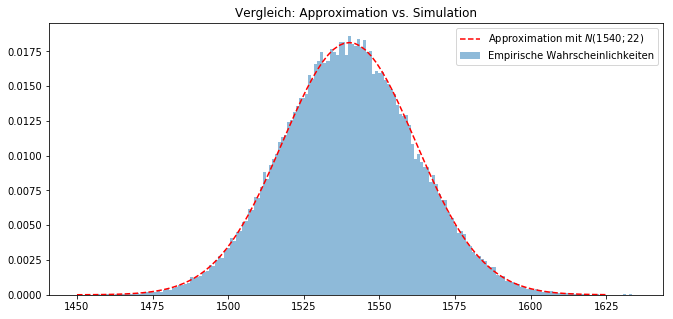

In [27]:
plt.figure(figsize=(11, 5))
# Zuerst die Approximation.
plt.plot(y, pdf_y, "--",
         color="red", label="Approximation mit $N(1540; 22)$")
# Dann die simulierten Werte.
plt.bar(vals, counts/100000, width=1, alpha=0.5,
        label="Empirische Wahrscheinlichkeiten")

plt.title("Vergleich: Approximation vs. Simulation")
plt.legend();

Wir sehen, im Großen und Ganzen machen wir keinen großen Fehler, wenn wir den zentralen Grenzwertsatz anwenden. Das liegt daran, dass in diesem Beispiel alle Voraussetzungen und Annahmen des zentralen Grenzwertsatzes erfüllt sind:
* die $X_i$ sind unabhängig und identisch verteilt
* die $X_i$ haben eine wohldefinierten Erwartungswert und Varianz (d.h. $E(X_i)$ und $Var(X_i) \neq \infty$)
* $n$ ist ziemlich groß ($n \leftarrow \infty)$